<div class="alert alert-block alert-success">
    <h1 align="center">Bike Sharing Demand - Machine Learning in Python</h1>
    <h2 align="center">Mina Mohammadi</h2>
    <h3 align="center">Bike Sharing Demand</h3>
    
</div>

<img src = "https://previews.123rf.com/images/tupungato/tupungato1705/tupungato170500161/78462208-new-york-usa-july-4-2013-citibike-bicycle-rental-station-in-new-york-with-330-stations-and-6-000-bic.jpg" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

## Load and Prepare Data

In [2]:
train=pd.read_csv("train.csv")

## EDA

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train.shape

(10886, 12)

In [6]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
#Split time and date from 'datetime' column
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [9]:
#Look at head of data_set after split time and date(convert to int)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [10]:
#Add 'weekend' column to check it's effect on bike renting
ls = []
for i in range(train.shape[0]):
    if train['holiday'][i] == 0 and train['workingday'][i] == 0:
        ls.append(1)
    else:
        ls.append(0)
train['weekend'] = ls

In [11]:
#Calculate counts for workingday, weekend and holiday. This is for check effect of these parameters on bike renting.
#for workingday_holiday_weekend
working = 0
weekend = 0
holiday = 0
for i in range(train.shape[0]):
    if train['workingday'][i] == 1:
        working += train['count'][i]
    elif train['weekend'][i] == 1:
        weekend += train['count'][i]
    elif train['holiday'][i] == 1:
        holiday += train['count'][i]
        
data = {'daystype':['workingday', 'weekend', 'holiday'], 'count':[working, weekend, holiday]}
traindt = pd.DataFrame(data)


In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.290557
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.454040
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,1.000000


## Data Preprocessing

In [13]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.002433
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.109748
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.934780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.032078
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.030873
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.023405
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,0.010463
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.016816
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.311558
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.114959


In [14]:
X = train[['hour','casual','registered']]
Y = train[['count']]

In [15]:
print(X)

       hour  casual  registered
0         0       3          13
1         1       8          32
2         2       5          27
3         3       3          10
4         4       0           1
...     ...     ...         ...
10881    19       7         329
10882    20      10         231
10883    21       4         164
10884    22      12         117
10885    23       4          84

[10886 rows x 3 columns]


## Strorytelling - Visualization

<AxesSubplot:>

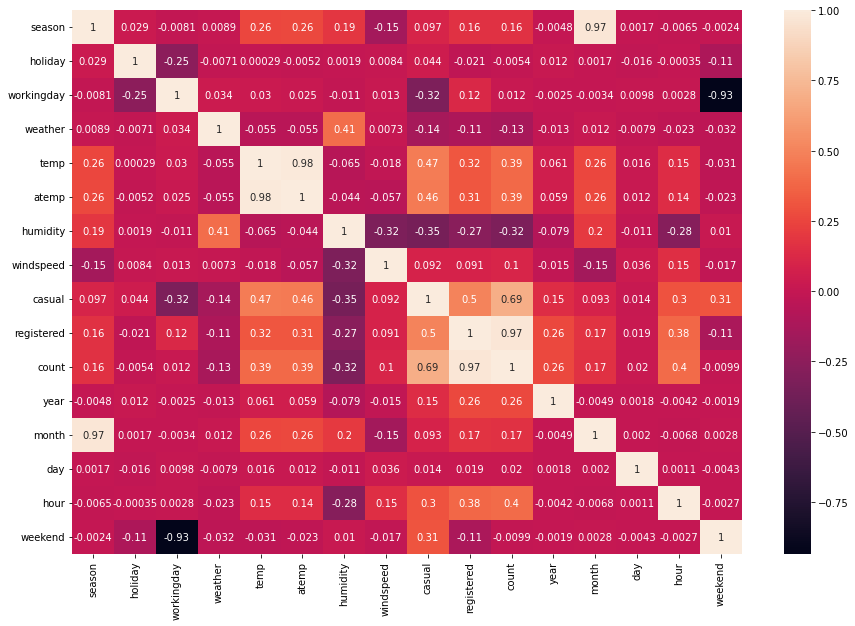

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True )

Text(0.5, 1.0, 'Bike renting count according to weekdays type')

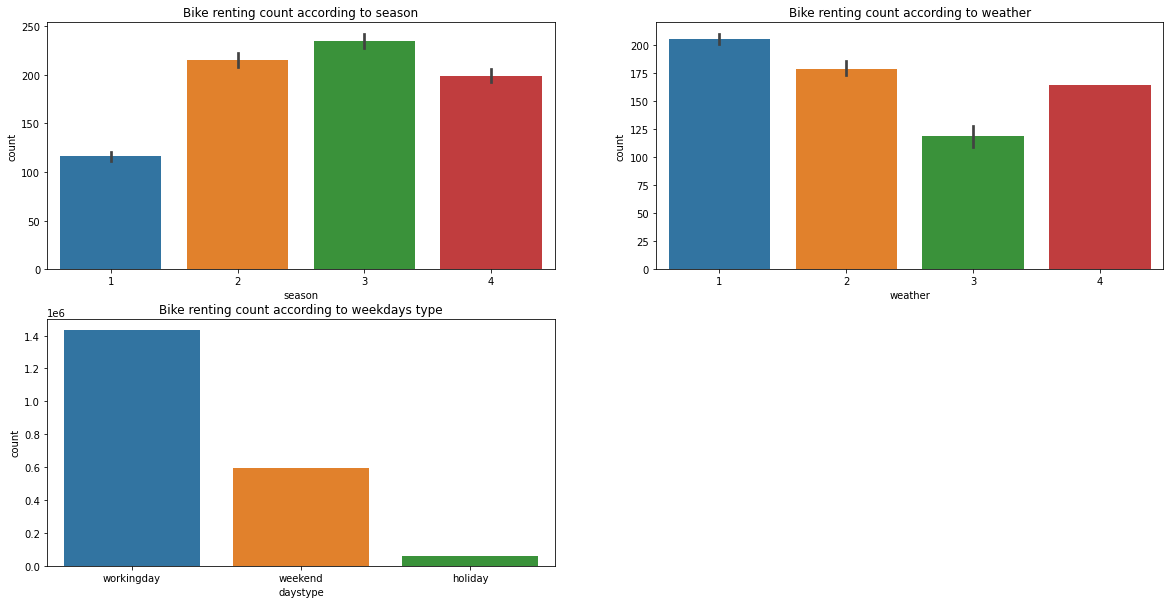

In [20]:
fig = plt.figure(figsize=(20,10))

axs1 = fig.add_subplot(221)
sns.barplot(x='season', y='count', data=train)
axs1.set_title('Bike renting count according to season')

axs2 = fig.add_subplot(222)
sns.barplot(x='weather', y='count', data=train)
axs2.set_title('Bike renting count according to weather')

axs3 = fig.add_subplot(223)
sns.barplot(x='daystype', y='count', data=traindt)
axs3.set_title('Bike renting count according to weekdays type')

## Train your model (Regression)

In [70]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [71]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [72]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
predictions=regressor.predict(X_test)

In [66]:
X_test

,hour
2962,8
6888,8
8035,4
1120,8
6212,2
...,...
8528,17
7962,3
8424,9
7386,3


In [74]:
predictions[0]

array([417.])

In [75]:
y_test

,count
2962,417
6888,638
8035,14
1120,259
6212,4
...,...
8528,755
7962,12
8424,327
7386,5


In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 3.197793895140593e-13
Mean Squared Error: 1.777274050401543e-25
Root Mean Squared Error: 4.2157728240520064e-13


In [77]:
regressor.coef_

array([[-9.2319044e-15,  1.0000000e+00,  1.0000000e+00]])

In [ ]:
#To Do:

## Test Result